In [1]:
import folium

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [12]:
table = pd.read_json('coords_coronavirus_on_date.txt')

In [13]:
table.head()

,date,coordinates
0,24 марта,"[[55.865884, 37.589033], [55.774234, 37.677751..."
1,25 марта,"[[55.852278, 37.658338], [55.673747, 37.6547],..."
2,26 марта,"[[55.618181, 37.660772], [55.898069, 37.615623..."
3,27 марта,"[[55.635691, 37.724912], [55.738622, 37.602813..."
4,28 марта,"[[55.648093, 37.394027], [55.545375, 37.523824..."


In [20]:
df = pd.DataFrame([i for i in table.coordinates], index=table.date)

In [24]:
df.loc['15 мая',0]

[55.535417, 37.062297]

In [95]:
data = pd.DataFrame([df.index, [len([x for x in df.iloc[i] if x is not None]) for i in range(len(df))]]).T
data.columns = ['date', 'quantity']
data.head()

,date,quantity
0,24 марта,97
1,25 марта,41
2,26 марта,42
3,27 марта,64
4,28 марта,72


In [135]:
x = [i for i in range(len(data))]
y = data.quantity.astype(float)

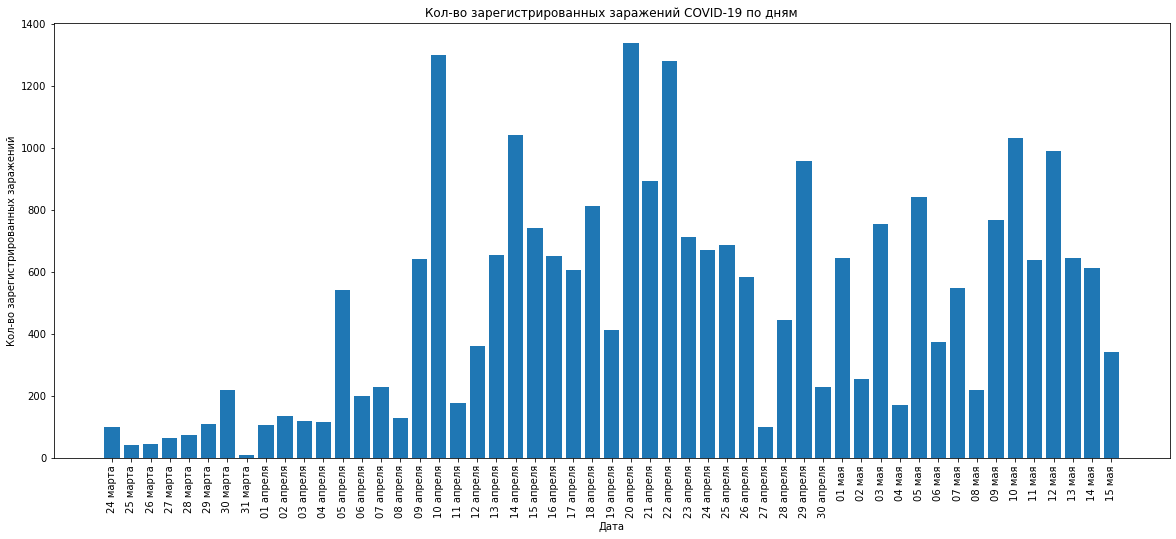

In [147]:
fig = plt.figure(figsize=(20, 8))
ax = plt.bar(x=data.date, height=y)
plt.xticks(rotation='vertical')
plt.ylabel('Кол-во зарегистрированных заражений')
plt.xlabel('Дата')
plt.title('Кол-во зарегистрированных заражений COVID-19 по дням')
plt.show()

Text(0.5, 1.0, 'Нормализованный график распределения')

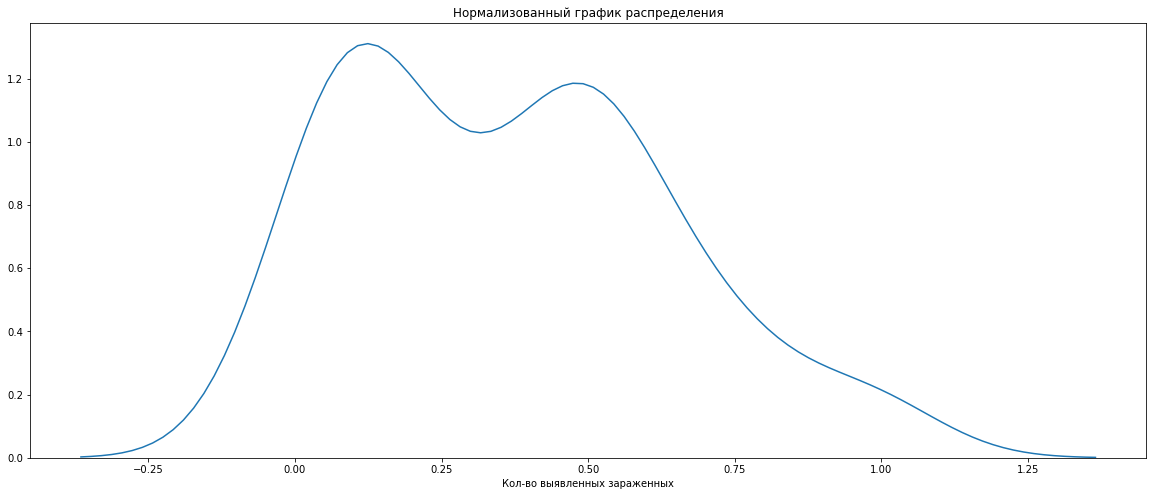

In [165]:
fig1 = plt.figure(figsize=(20, 8))
ax1 = sns.distplot((y-y.min())/(y.max()-y.min()), hist=False)
plt.xlabel('Кол-во выявленных зараженных')
plt.title('Нормализованный график распределения')

In [152]:
data.quantity

0       97
1       41
2       42
3       64
4       72
5      107
6      217
7        7
8      104
9      133
10     118
11     113
12     541
13     200
14     227
15     128
16     639
17    1297
18     175
19     360
20     654
21    1041
22     739
23     651
24     606
25     811
26     410
27    1336
28     892
29    1280
30     712
31     670
32     686
33     581
34     100
35     442
36     957
37     227
38     642
39     252
40     754
41     169
42     841
43     372
44     547
45     219
46     765
47    1030
48     637
49     988
50     644
51     611
52     339
Name: quantity, dtype: object

In [164]:
print('Итого по данным mash.ru в Москве и МО', data.quantity.sum(), 'заболевших')

Итого по данным mash.ru в Москве и МО 26287 заболевших
